In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import time
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np 
import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as MSE
from pyGRNN import GRNN #imports the GRNN regressor module
from pyGRNN import feature_selection as FS #imports the GRNN feature selector module
import math
import numpy as np
from numpy.random import seed
seed(1)
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Layer
from keras import backend as K
import gc
import numpy as np
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from mlens.visualization import corr_X_y, corrmat
from mlens.metrics import make_scorer
from mlens.model_selection import Evaluator
from scipy.stats import uniform, randint
from matplotlib.pyplot import show
%matplotlib inline
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

In [ ]:
pip install pyGRNN

In [237]:
df = pd.read_csv(r'C:\diploma\datasets\02.desharnais.csv', engine='python')
df.head(5)

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               81 non-null     int64
 1   Project          81 non-null     int64
 2   TeamExp          81 non-null     int64
 3   ManagerExp       81 non-null     int64
 4   YearEnd          81 non-null     int64
 5   Length           81 non-null     int64
 6   Effort           81 non-null     int64
 7   Transactions     81 non-null     int64
 8   Entities         81 non-null     int64
 9   PointsNonAdjust  81 non-null     int64
 10  Adjustment       81 non-null     int64
 11  PointsAjust      81 non-null     int64
 12  Language         81 non-null     int64
dtypes: int64(13)
memory usage: 8.4 KB


In [239]:
#Remove insignificant fields
df = df.drop(columns = ['id', 'Project'])

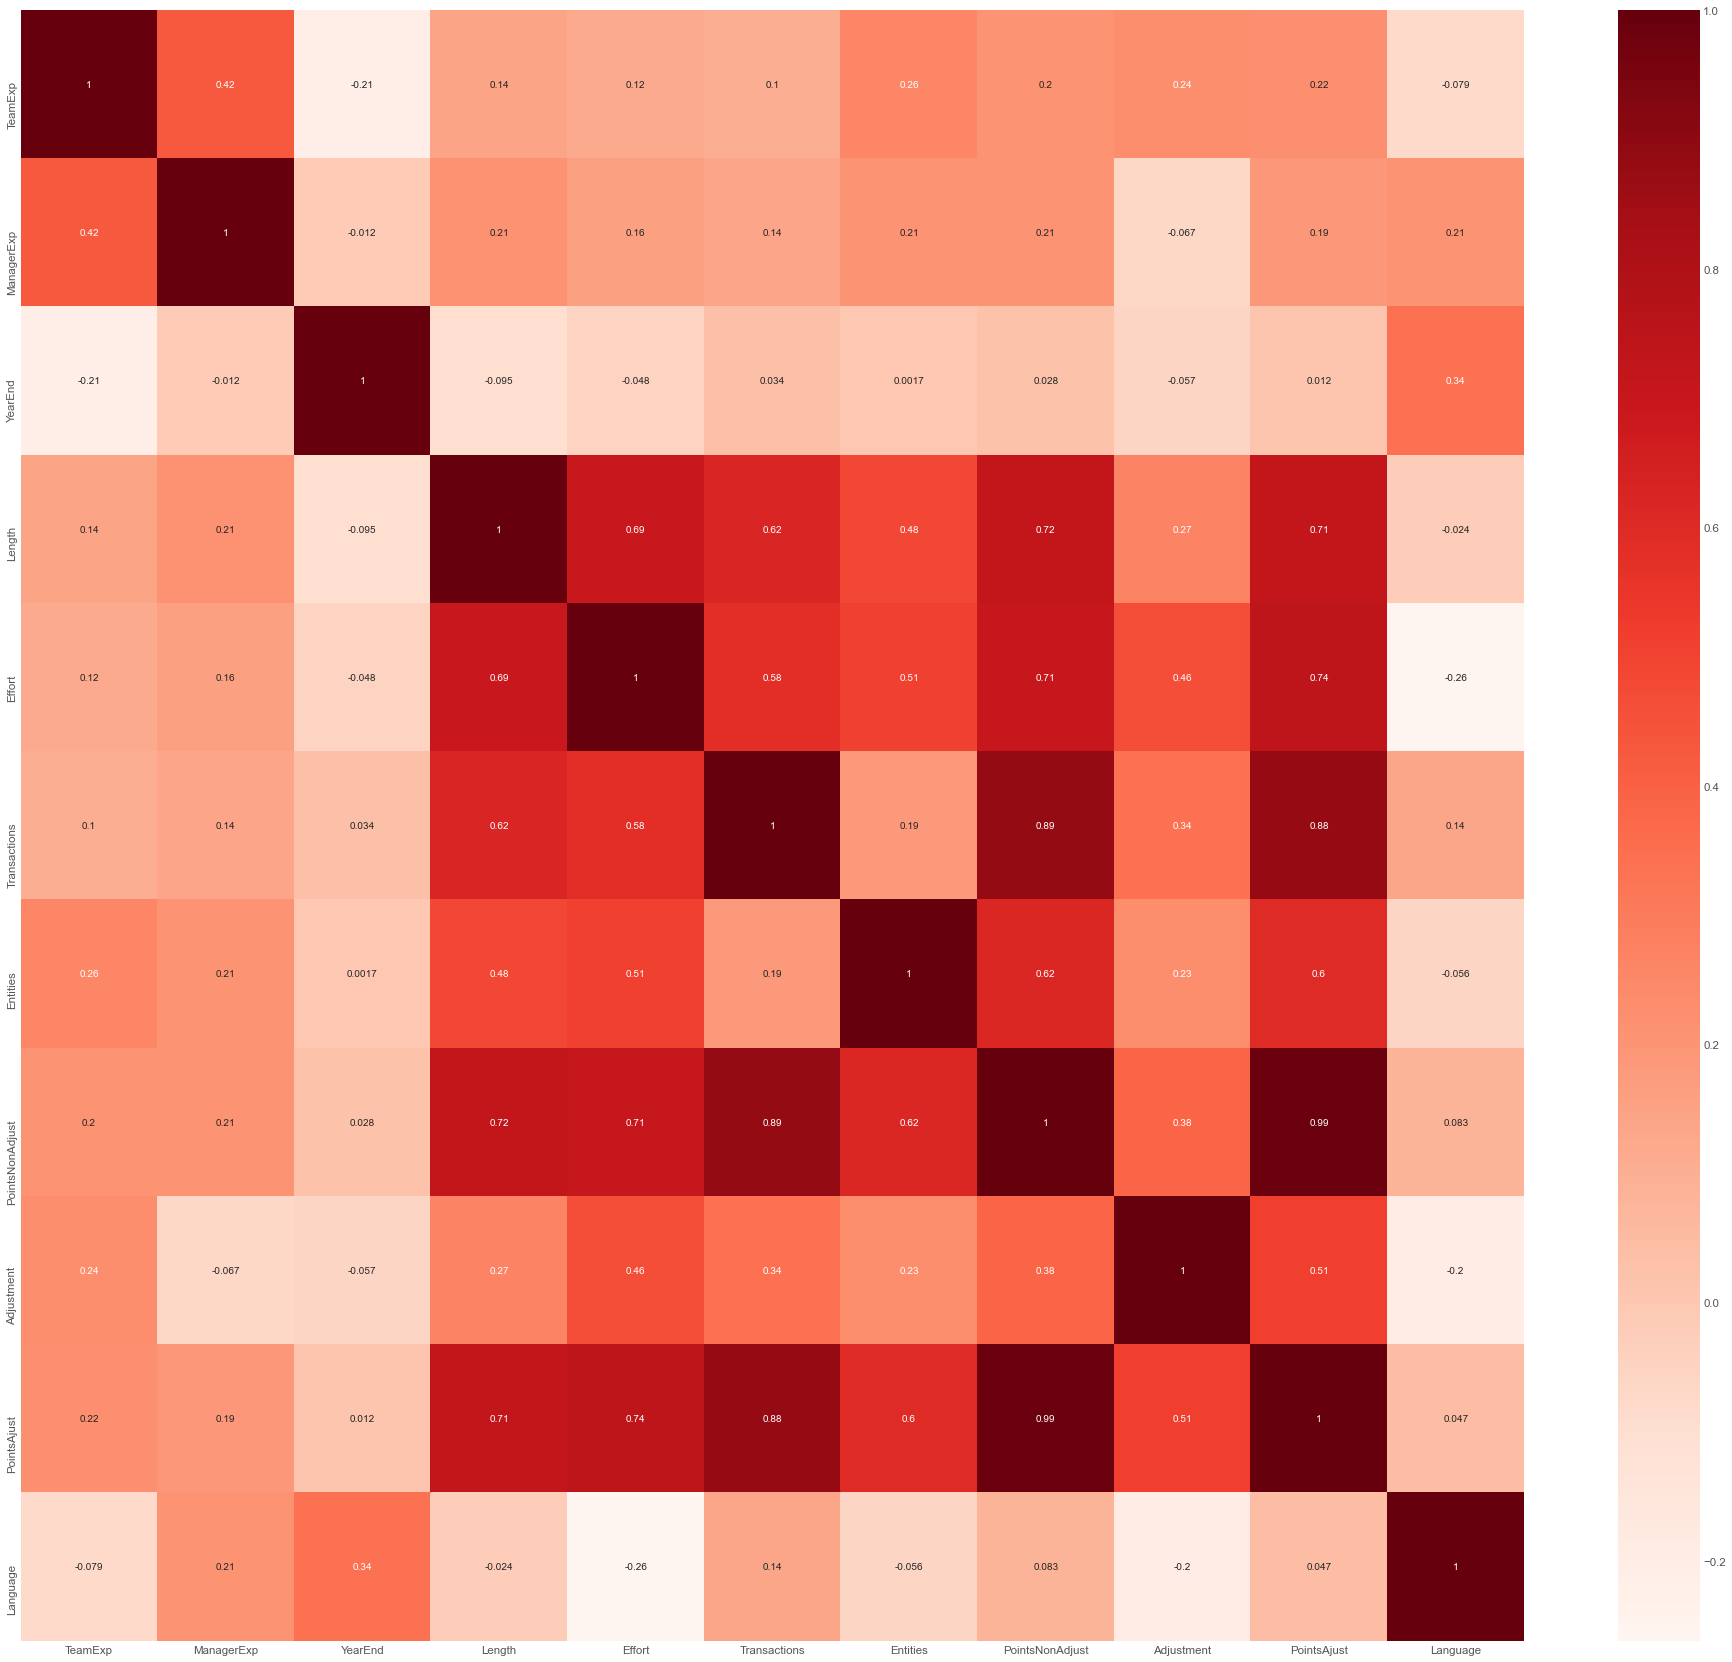

In [240]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [242]:
#Remove columns with low correlation values
df = df.drop(columns = ['YearEnd', 'TeamExp', 'ManagerExp', 'Language'])

KeyError: "['YearEnd' 'TeamExp' 'ManagerExp' 'Language'] not found in axis"

In [165]:
df.columns.values

array(['Length', 'Effort', 'Transactions', 'Entities', 'PointsNonAdjust',
       'Adjustment', 'PointsAjust'], dtype=object)

In [166]:
# SVR

In [167]:
def launch_model(name,model, X_train, y_train, X_test, y_test):
    start = time.time()
    model.fit(X_train[predictors], y_train)
    y_pred = model.predict(X_test[predictors])
    ypred_train = model.predict(X_train[predictors])
    print ('RMSE', math.sqrt(mean_squared_error(y_test, y_pred)))
    print ('MAE', mean_absolute_error(y_test, y_pred))
    r_2 = round(r2_score(y_test, y_pred), 2)
    print ('R^2', r_2)
    print('Execution time: {0:.2f} sec.'.format(time.time() - start))
    return name + '($R^2={:.3f}$)'.format(r_2), np.array(y_test), y_pred

In [168]:
def plot(results):

    fig, plts = plt.subplots(nrows=len(results), figsize=(8, 8))
    fig.canvas.set_window_title('Predicting Boston')

    for subplot, (title, y, y_pred) in zip(plts, results):

        subplot.set_xticklabels(())
        subplot.set_yticklabels(())

        subplot.set_ylabel('Precio casa')

        subplot.set_title(title)

        subplot.plot(y, 'b', label='actual')
        subplot.plot(y_pred, 'r', label='predicted')
        
        subplot.fill_between(
            np.arange(0, len(y), 1),
            y,
            y_pred,
            color='r',
            alpha=0.2
        )
        subplot.axvline(len(y) // 2, linestyle='--', color='0', alpha=0.2)
        subplot.legend()
    fig.tight_layout()
    plt.show()
    plt.savefig('plot.png')
    plt.close()

In [169]:
target = df['Effort']
predictors = ['Length', 'Effort', 'Transactions', 'Entities', 'PointsNonAdjust',
       'Adjustment', 'PointsAjust']
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [170]:
svr_rbf = SVR(kernel='rbf', gamma=0.1)
svr_lineal = SVR(kernel='linear')
lr = LinearRegression()

In [171]:
results = []
print ('-----------')
print ('SVR - RBF')
print ('-----------')
results.append(launch_model('SVR - RBF', svr_rbf, X_train, y_train, X_test, y_test))
print ('-----------')
print ('SVR - lineal')
print ('-----------')
results.append(launch_model('SVR - lineal', svr_lineal, X_train, y_train, X_test, y_test))
print ('-----------')
print ('Regresion lineal')
print ('-----------')
results.append(launch_model('Regresion lineal', lr, X_train, y_train, X_test, y_test))

-----------
SVR - RBF
-----------
RMSE 3030.392636179636
MAE 2177.6470588235293
R^2 -0.02
Execution time: 0.02 sec.
-----------
SVR - lineal
-----------
RMSE 0.052686692696273935
MAE 0.04386009149766992
R^2 1.0
Execution time: 0.06 sec.
-----------
Regresion lineal
-----------
RMSE 1.4322099890797845e-12
MAE 1.0699937667916803e-12
R^2 1.0
Execution time: 0.01 sec.


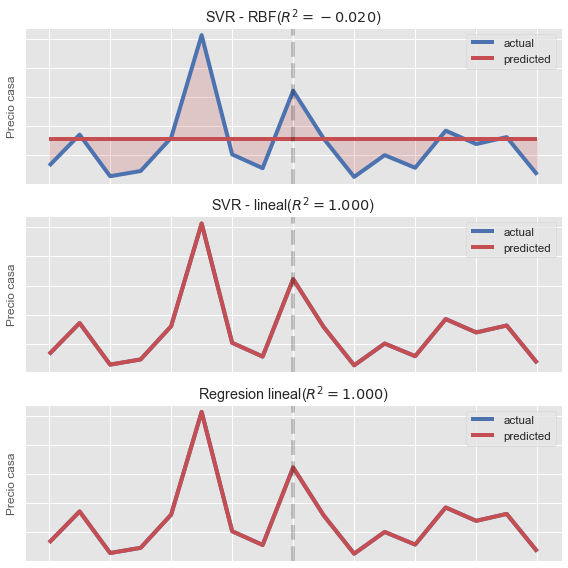

In [172]:
plot(results)

In [173]:
# Random Forests

In [174]:
labels = np.array(df['Effort'])
df = df.drop('Effort', axis = 1)
feature_list = list(df.columns)
features = np.array(df)

In [175]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [230]:
rf = RandomForestRegressor(n_estimators = 1000) #, random_state = 42
rf.fit(train_features, train_labels);

In [231]:
predictions = rf.predict(test_features)

In [232]:
mae = mean_absolute_error(test_labels, predictions)
print('Mean Absolute Error:', mae)
mse_sqrt = math.sqrt(mean_squared_error(test_labels, predictions))
print('Mean Squared Error Root:', mse_sqrt)
r2 = round(r2_score(test_labels, predictions), 2)
print('R^2:', r2)

Mean Absolute Error: 1789.9879523809525
Mean Squared Error Root: 2337.1468268068
R^2: 0.53


In [71]:
results.append(('Random Forest' + '($R^2={:.3f}$)'.format(r2), np.array(y_test), predictions))

In [73]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
#In future implementations of the model, we can remove those variables 
# that have no importance and the performance will not suffer.

Variable: Length               Importance: 0.34
Variable: PointsAjust          Importance: 0.2
Variable: PointsNonAdjust      Importance: 0.13
Variable: Transactions         Importance: 0.12
Variable: Adjustment           Importance: 0.11
Variable: Entities             Importance: 0.1


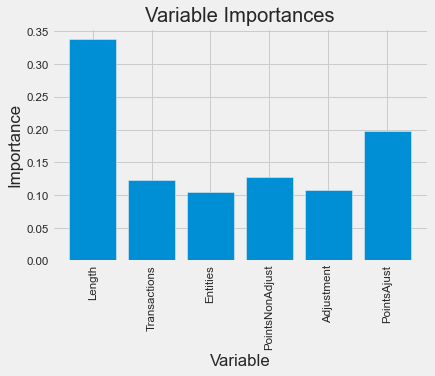

In [74]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [235]:
#GRNN

In [243]:
y = df['Effort'].values.ravel()
X = df.drop(["Effort"], axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(preprocessing.minmax_scale(X), y.reshape((-1, 1)), test_size=0.25, random_state = 42)

featnames=list(df.drop(["Effort"], axis = 1).columns)

Searching relatidness for feature 0
Best subset is: ['Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust']
Searching relatidness for feature 1
Best subset is: ['Entities', 'PointsNonAdjust', 'PointsAjust']
Searching relatidness for feature 2
Best subset is: ['Transactions', 'PointsNonAdjust', 'PointsAjust']
Searching relatidness for feature 3
Best subset is: ['Transactions', 'Adjustment', 'PointsAjust']
Searching relatidness for feature 4
Best subset is: ['Length', 'Transactions', 'PointsNonAdjust', 'PointsAjust']
Searching relatidness for feature 5
Best subset is: ['Transactions', 'PointsNonAdjust', 'Adjustment']
Time to complete the search [s]: 0.3678734302520752


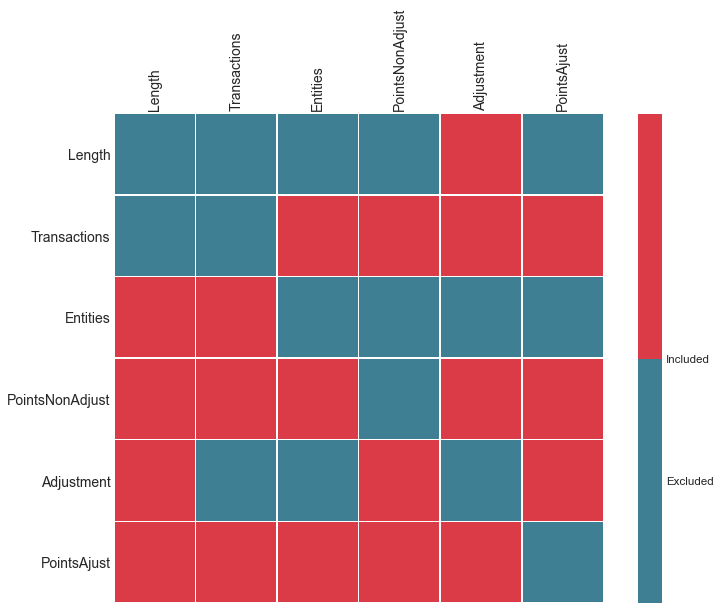

In [244]:
IsotropicSelector = FS.Isotropic_selector()

start = time.time()
IsotropicSelector.relatidness(X_train, feature_names=featnames, strategy = 'ffs')
IsotropicSelector.plot_(featnames)
print('Time to complete the search [s]: ' + str(time.time() - start))

In [245]:
print('Selecting the best subset of features using a forward fs strategy:')
start = time.time()
IsotropicSelector.ffs(X_train, y_train, feature_names=featnames)
print('Time to complete the search [s]: ' + str(time.time() - start))

Selecting the best subset of features using a forward fs strategy:
Best subset is: ['Transactions', 'PointsNonAdjust', 'Adjustment']
Time to complete the search [s]: 0.02291131019592285


In [246]:
print('Selecting the best subset of features using a backward fs strategy:')
start = time.time()
IsotropicSelector.bfs(X_train, y_train, feature_names=featnames)
print('Time to complete the search [s]: ' + str(time.time() - start))

Selecting the best subset of features using a backward fs strategy:
Best subset is: ['Transactions', 'PointsNonAdjust', 'Adjustment']
Time to complete the search [s]: 0.004988431930541992


In [247]:
print('Selecting the best subset of features using an exhaustive search:')
start = time.time()
IsotropicSelector.es(X_train, y_train, feature_names=featnames)
print('Time to complete the search [s]: ' + str(time.time() - start))

Selecting the best subset of features using an exhaustive search:
Exploring the 63 possible combination of features...
The best subset of features is ['Transactions', 'PointsNonAdjust', 'Adjustment']
Time to complete the search [s]: 0.16327309608459473


In [248]:
print('Performing a complete feature selection from scratch:')
start = time.time()
IsotropicSelector.feat_selection(X_train, y_train, feature_names=featnames, strategy = 'ffs')
print('Time to complete the feature selection [s]: ' + str(time.time() - start))

Performing a complete feature selection from scratch:
Searching relevant features...
Best subset is: ['Transactions', 'PointsNonAdjust', 'Adjustment']
Searching the best subset to predict feature 1
Best subset is: ['Entities', 'PointsNonAdjust', 'PointsAjust']
[0, 1, 4]
Searching the best subset to predict feature 3
Best subset is: ['Transactions', 'Adjustment', 'PointsAjust']
[0, 2, 3]
Searching the best subset to predict feature 4
Best subset is: ['Length', 'Transactions', 'PointsNonAdjust', 'PointsAjust']
[2, 4]
Research completed!
The relevant features are: ['Transactions', 'PointsNonAdjust', 'Adjustment']
The redundant features are: ['Entities', 'PointsAjust', 'Length']
The irrelevant features are: []
Time to complete the feature selection [s]: 0.1495985984802246


In [249]:
best_set = IsotropicSelector.best_inSpaceIndex
X_train_BestSet = X_train[:,best_set]
X_test_BestSet = X_test[:,best_set]

# Instantiate the estimator
IGRNN = GRNN()
# Define the parameters for a GridSearch CV and fit the model
params_IGRNN = {'kernel':["RBF"],
                'sigma' : list(np.arange(0.1, 4, 0.01)),
                'calibration' : ['None']
                 }
grid_IGRNN = GridSearchCV(estimator=IGRNN,
                          param_grid=params_IGRNN,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1,
                          n_jobs = -1
                          )
grid_IGRNN.fit(X_train_BestSet, y_train.ravel())
# Use the best model to perform prediction, and compute mse
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(X_test_BestSet)
mse_IGRNN = MSE(y_test, y_pred)
print('MSE with IGRNN (after feature selection): ' + str(mse_IGRNN))

Fitting 5 folds for each of 390 candidates, totalling 1950 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.8s


MSE with IGRNN (after feature selection): 9615246.100037513


[Parallel(n_jobs=-1)]: Done 1950 out of 1950 | elapsed:    7.8s finished


In [250]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
mse_sqrt = math.sqrt(mean_squared_error(y_test, y_pred))
print('Mean Squared Error Root:', mse_sqrt)
r2 = round(r2_score(y_test, y_pred), 2)
print('R^2:', r2)

Mean Absolute Error: 2165.5503843630136
Mean Squared Error Root: 3100.846029721165
R^2: 0.17


In [91]:
df.Effort.mode()[0]

546

In [199]:
#Usual NN

In [126]:
y1 = np.array(df.Effort)

In [127]:
x1 = np.column_stack((df.Length,df.Transactions,df.Entities,df.PointsNonAdjust,df.Adjustment,df.PointsAjust))
x1 = sm.add_constant(x1, prepend=True)

In [128]:
X_train, X_val, y_train, y_val = train_test_split(x1, y1)

In [129]:
# The training and validation data is then scaled using MinMaxScaler:
y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_val))
xval_scale=scaler_x.transform(X_val)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [130]:
model = Sequential()
model.add(Dense(7, input_dim=7, kernel_initializer='normal', activation='elu'))
model.add(Dense(1000, activation='elu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              8000      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 1001      
Total params: 9,057
Trainable params: 9,057
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=50, batch_size=150, verbose=1, validation_split=0.2)
predictions = model.predict(xval_scale)

Epoch 1/50
1/1 [==============================] - 1s 749ms/step - loss: 0.0827 - mse: 0.0827 - mae: 0.2178 - val_loss: 0.1256 - val_mse: 0.1256 - val_mae: 0.2400
Epoch 2/50
1/1 [==============================] - 0s 75ms/step - loss: 0.0614 - mse: 0.0614 - mae: 0.1724 - val_loss: 0.1013 - val_mse: 0.1013 - val_mae: 0.1954
Epoch 3/50
1/1 [==============================] - 0s 61ms/step - loss: 0.0452 - mse: 0.0452 - mae: 0.1381 - val_loss: 0.0822 - val_mse: 0.0822 - val_mae: 0.1653
Epoch 4/50
1/1 [==============================] - 0s 56ms/step - loss: 0.0344 - mse: 0.0344 - mae: 0.1231 - val_loss: 0.0686 - val_mse: 0.0686 - val_mae: 0.1616
Epoch 5/50
1/1 [==============================] - 0s 99ms/step - loss: 0.0289 - mse: 0.0289 - mae: 0.1308 - val_loss: 0.0605 - val_mse: 0.0605 - val_mae: 0.1658
Epoch 6/50
1/1 [==============================] - 0s 77ms/step - loss: 0.0286 - mse: 0.0286 - mae: 0.1460 - val_loss: 0.0570 - val_mse: 0.0570 - val_mae: 0.1797
Epoch 7/50
1/1 [=================

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


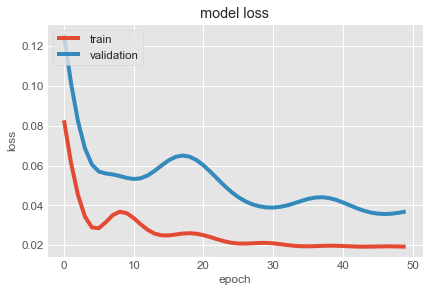

In [132]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [133]:
predictions = scaler_y.inverse_transform(predictions)

In [134]:
mae = mean_absolute_error(y_val, predictions)
print('Mean Absolute Error:', mae)
mse_sqrt = math.sqrt(mean_squared_error(y_val, predictions))
print('Mean Squared Error Root:', mse_sqrt)
r2 = round(r2_score(y_val, predictions), 2)
print('R^2:', r2)

Mean Absolute Error: 1774.748070126488
Mean Squared Error Root: 2896.491635536132
R^2: 0.68


In [135]:
np.mean(y_val)

4760.0

In [136]:
np.mean(predictions)

4401.7134

In [ ]:
# RBFN

In [150]:
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [265]:
model = Sequential()
#model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(7, input_dim=7, kernel_initializer='normal', activation='relu'))
model.add(RBFLayer(100, 0.9))
model.add(Dense(1, activation='sigmoid', name='foo'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 7)                 56        
_________________________________________________________________
rbf_layer_6 (RBFLayer)       (None, 100)               700       
_________________________________________________________________
foo (Dense)                  (None, 1)                 101       
Total params: 857
Trainable params: 857
Non-trainable params: 0
_________________________________________________________________


In [266]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse','mae'])

In [267]:
history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=256, verbose=1, validation_split=0.2)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.1388 - mse: 0.1388 - mae: 0.3432 - val_loss: 0.1066 - val_mse: 0.1066 - val_mae: 0.3041
Epoch 2/30
1/1 [==============================] - 0s 80ms/step - loss: 0.0926 - mse: 0.0926 - mae: 0.2766 - val_loss: 0.0919 - val_mse: 0.0919 - val_mae: 0.2706
Epoch 3/30
1/1 [==============================] - 0s 58ms/step - loss: 0.0713 - mse: 0.0713 - mae: 0.2426 - val_loss: 0.0846 - val_mse: 0.0846 - val_mae: 0.2492
Epoch 4/30
1/1 [==============================] - 0s 85ms/step - loss: 0.0593 - mse: 0.0593 - mae: 0.2213 - val_loss: 0.0807 - val_mse: 0.0807 - val_mae: 0.2358
Epoch 5/30
1/1 [==============================] - 0s 77ms/step - loss: 0.0519 - mse: 0.0519 - mae: 0.2068 - val_loss: 0.0786 - val_mse: 0.0786 - val_mae: 0.2252
Epoch 6/30
1/1 [==============================] - 0s 73ms/step - loss: 0.0471 - mse: 0.0471 - mae: 0.1962 - val_loss: 0.0775 - val_mse: 0.0775 - val_mae: 0.2167
Epoch 7/30
1/1 [====================

In [268]:
predictions = model.predict(xval_scale)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


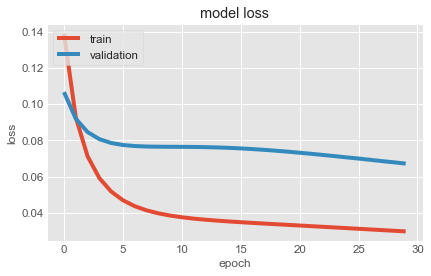

In [269]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [270]:
predictions = scaler_y.inverse_transform(predictions)

In [271]:
mae = mean_absolute_error(y_val, predictions)
print('Mean Absolute Error:', mae)
mse_sqrt = math.sqrt(mean_squared_error(y_val, predictions))
print('Mean Squared Error Root:', mse_sqrt)
r2 = round(r2_score(y_val, predictions), 2)
print('R^2:', r2)
print(r2)

Mean Absolute Error: 3293.4040876116073
Mean Squared Error Root: 4543.778700592955
R^2: 0.2
0.2


In [158]:
np.mean(y_val)

4760.0

In [159]:
np.mean(predictions)

9004.807